In [43]:

import clawpack.pyclaw as pyclaw 
import os, fnmatch
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from clawpack.pyclaw.solution import Solution
from clawpack.pyclaw import solution

    
# Finding the home directory
from os.path import expanduser
home = expanduser("~")
cwd = os.getcwd()

user_directory = cwd

dirName = '_output'  #directory in which the results lie
dirName = '_output_boussinesq'
dirAddress = user_directory+"/"+dirName

print("Here are the output files: "+dirAddress)
files=fnmatch.filter(os.listdir(dirAddress), 'fort.q*' )
NbSim = len(files)
print("number of files: "+str(NbSim))

Here are the output files: /home/ancey/tsunami_LeVeque/bouss_wavetank_matsuyama/_output_boussinesq
number of files: 49


# Particular solution 

depth at x = 1.00 m, h = 0.00  m


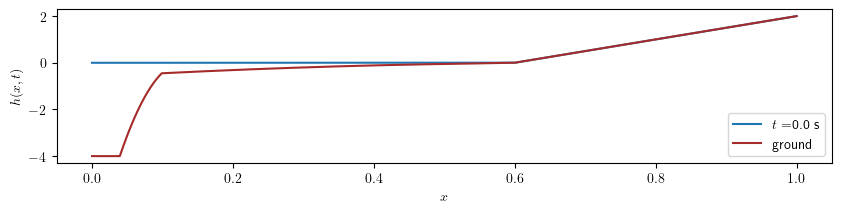

In [44]:
# Plot solution h(x, t)

frameNo   = 0
framesoln = solution.Solution(frameNo,  path=dirAddress,file_format='ascii')

x   = framesoln.state.grid.x.centers
h   = framesoln.state.q[0]
eta = h+framesoln.state.aux[0]
g   = 9.81 ; q0 = 0.00227273 ; tt = framesoln.t

htrue= framesoln.state.aux[0]
xmax = max(x)

print('depth at x = {:.2f} m, h = {:.2f}  m'.format(xmax, h[-1]))

plt.rcParams['text.usetex'] = True
 
#true = qtrue(x,t)
fig, ax = plt.subplots(figsize=(10, 2))
 
ax.plot(x, eta,  label=r'$ t = ${:.1f} s'.format(framesoln.t))
ax.plot(x, htrue, color='brown',label='ground')
ax.legend(loc='lower right')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$h(x, t)$');


# Animation

In [35]:
# Animation for depth 
def dambreak_animation():
    sol=solution.Solution(1, path=dirAddress, file_format='ascii')
    frame = np.empty((NbSim,)+sol.state.q.shape)
    xsol = np.empty((NbSim, sol.state.q.shape[1]))
    hsol = np.empty((NbSim, sol.state.q.shape[1]))
    tps  = np.empty(NbSim)
    ground = sol.state.aux[0]
    xgr    = sol.state.grid.x.centers

    for i in range(0,NbSim):
        sol     = solution.Solution(i, path=dirAddress, file_format='ascii')
        tps[i]  = sol.t
        xsol[i] = sol.state.grid.x.centers
        hsol[i] = sol.state.q[0]+framesoln.state.aux[0]
        

    hmin = -4
    hmax = 2
    L    = max(sol.grid.x.centers)
    x0   = min(sol.grid.x.centers)
    
    x_true = np.linspace(x0, L , 500)
    
    fig = plt.figure(figsize=(10,2))
    axes = plt.subplot(1, 1, 1)
    plt.rcParams['text.usetex'] = True
    axes.set_xlabel(r'$x$',fontsize=14)
    axes.set_ylabel(r'$h(x, t)$',fontsize=14)
    axes.set_title(" ")
    text = axes.text(L/2, 0.9*hmax , '')

    axes.plot(xgr, ground, 'brown',linewidth = '1')

    def init():
        axes.plot(xsol[0][0], hsol[0][0], 'brown')
        computed_line, = axes.plot(xsol[0][0], hsol[0][0], 'brown')
        
        exact_line, = axes.plot(x_true[0], 0 , 'k--')
        return  (computed_line, exact_line)
    
    computed_line, exact_line = init()
 
    def fplot(n):
        tt = tps[n]
         
        computed_line.set_data([xsol[n],], [hsol[n][:]] )
        computed_line.set_color('blue')
        exact_line.set_data([xgr], [ground])
        tt = tps[n]
        val = f'{tt:.2f}'
        text.set_text(r'$ t = {} $ s'.format(val))
         
        return (computed_line, exact_line)

    frames_to_plot = range(0, NbSim)
    plt.close(fig)
    return matplotlib.animation.FuncAnimation(fig, fplot, frames=frames_to_plot, interval=100,
                                   blit=True, init_func=None, repeat=False)


from IPython.display import HTML 
anim = dambreak_animation( )
HTML(anim.to_jshtml()) 

2024-02-07 13:36:28,437 INFO CLAW: Animation.save using <class 'matplotlib.animation.HTMLWriter'>


## mp4

In [5]:
# Export mp4
anim.save('depth.mp4',fps=5,writer="ffmpeg",dpi=300)


2024-02-07 07:47:34,207 INFO CLAW: Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2024-02-07 07:47:34,208 INFO CLAW: MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 1920x1440 -pix_fmt rgba -framerate 5 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y depth.mp4


## png

In [45]:
# Alternative to export snapshots

import matplotlib.colors as mcolors
def ExportAnimation():
    figs = []
 
    sol=solution.Solution(1, path=dirAddress, file_format='ascii')
    frame = np.empty((NbSim,)+sol.state.q.shape)
    xsol = np.empty((NbSim, sol.state.q.shape[1]))
    hsol = np.empty((NbSim, sol.state.q.shape[1]))
    eta  = np.empty((NbSim, sol.state.q.shape[1]))
    tps  = np.empty(NbSim)
    ground = sol.state.aux[0]

    for i in range(0,NbSim):
        sol     = solution.Solution(i, path=dirAddress, file_format='ascii')
        tps[i]  = sol.t
        xsol[i] = sol.state.grid.x.centers
        hsol[i] = sol.state.q[0]
        eta[i]  = sol.state.q[2]
    
    hmin = -.2
    hmax = .2
    L = max(sol.grid.x.centers)
    L =0.62
    x0 = min(sol.grid.x.centers)
    xmoy = (L+x0)/2

    for i in range(0,NbSim):
        fig = plt.figure( figsize=(10,2))
        axes = plt.subplot(1, 1, 1)
        plt.rcParams['text.usetex'] = True
        axes.set_xlabel(r'$\hat x $',fontsize=14)
        axes.set_ylabel(r'$\hat h $  ',fontsize=14)
        axes.set_xlim((x0,L))
        axes.set_ylim(( hmin, hmax))
        #axes.plot(xpoints, ypoints, 'k',linewidth = '15')
        text = axes.text(L/2, 0.8*hmax , '')
        tt   = tps[i]
        val  = f'{tt:.2f}'
        text.set_text(r'$\hat t = {} $  '.format(val))
        axes.set_title(" ")
        axes.plot(xsol[i] , ground ,  color = "brown")
        axes.fill_between(xsol[i][xsol[40]<L], eta[i][xsol[40]<L] ,\
                          ground[xsol[40]<L],  color = "lightskyblue")
        figs.append(fig)
        plt.close(fig)
    return figs

from clawpack.visclaw import animation_tools
figures = ExportAnimation()
animation_tools.interact_animate_figs(figures)

interactive(children=(IntSlider(value=0, description='frameno', max=48), Output()), _dom_classes=('widget-inte…

In [46]:
# export figures for latex
mydir = 'tsunami_boussinesq'
if not os.path.isdir(mydir): os.mkdir(user_directory+"/"+mydir)
for i in range(len(figures)):
    figures[i].savefig(user_directory+'/'+mydir+'/Frame'+str(i)+'.png', bbox_inches='tight',dpi=300)